In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL for each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Loog the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed daata
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | edson
Processing Record 3 of Set 1 | jabiru
City not found. Skipping...
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | rungata
City not found. Skipping...
Processing Record 6 of Set 1 | teknaf
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | beloha
Processing Record 9 of Set 1 | mahon
Processing Record 10 of Set 1 | meulaboh
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | buala
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | baruun-urt
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | san quintin
Processing Record 20 of Set 1 | nouakchott
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 of Set 1 | klaksvik
Proc

Processing Record 30 of Set 4 | bintulu
Processing Record 31 of Set 4 | linxia
Processing Record 32 of Set 4 | tombouctou
Processing Record 33 of Set 4 | marzuq
Processing Record 34 of Set 4 | yumen
Processing Record 35 of Set 4 | vidalia
Processing Record 36 of Set 4 | carnarvon
Processing Record 37 of Set 4 | deputatskiy
Processing Record 38 of Set 4 | laguna
Processing Record 39 of Set 4 | airai
Processing Record 40 of Set 4 | atbasar
Processing Record 41 of Set 4 | fortuna
Processing Record 42 of Set 4 | saleaula
City not found. Skipping...
Processing Record 43 of Set 4 | lebu
Processing Record 44 of Set 4 | sao filipe
Processing Record 45 of Set 4 | basco
Processing Record 46 of Set 4 | szubin
Processing Record 47 of Set 4 | henties bay
Processing Record 48 of Set 4 | ca mau
Processing Record 49 of Set 4 | muroto
Processing Record 50 of Set 4 | chokurdakh
Processing Record 1 of Set 5 | itupiranga
Processing Record 2 of Set 5 | norman wells
Processing Record 3 of Set 5 | barre
Proc

Processing Record 18 of Set 8 | novikovo
Processing Record 19 of Set 8 | yinchuan
Processing Record 20 of Set 8 | akdepe
Processing Record 21 of Set 8 | toktogul
Processing Record 22 of Set 8 | lake city
Processing Record 23 of Set 8 | le port
Processing Record 24 of Set 8 | alfreton
Processing Record 25 of Set 8 | pampas
Processing Record 26 of Set 8 | monastyrshchina
Processing Record 27 of Set 8 | marsa matruh
Processing Record 28 of Set 8 | sisimiut
Processing Record 29 of Set 8 | port hardy
Processing Record 30 of Set 8 | goderich
Processing Record 31 of Set 8 | alvorada
Processing Record 32 of Set 8 | zdvinsk
Processing Record 33 of Set 8 | timra
Processing Record 34 of Set 8 | usinsk
Processing Record 35 of Set 8 | aksarka
Processing Record 36 of Set 8 | presidencia roque saenz pena
Processing Record 37 of Set 8 | walvis bay
Processing Record 38 of Set 8 | puyang
Processing Record 39 of Set 8 | ambovombe
Processing Record 40 of Set 8 | tual
Processing Record 41 of Set 8 | espera

Processing Record 10 of Set 12 | klyuchi
Processing Record 11 of Set 12 | korla
Processing Record 12 of Set 12 | manaus
Processing Record 13 of Set 12 | saryshagan
City not found. Skipping...
Processing Record 14 of Set 12 | xixiang
Processing Record 15 of Set 12 | bocas del toro
Processing Record 16 of Set 12 | alugan
Processing Record 17 of Set 12 | cayenne
Processing Record 18 of Set 12 | cascais
Processing Record 19 of Set 12 | gloversville
Processing Record 20 of Set 12 | ankang
Processing Record 21 of Set 12 | broken hill
Processing Record 22 of Set 12 | ketou
Processing Record 23 of Set 12 | pitimbu
Processing Record 24 of Set 12 | lachhmangarh
Processing Record 25 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 26 of Set 12 | smolenka
Processing Record 27 of Set 12 | hornepayne
Processing Record 28 of Set 12 | bunbury
Processing Record 29 of Set 12 | mahajanga
Processing Record 30 of Set 12 | poum
Processing Record 31 of Set 12 | college
Processing Record 32

In [9]:
len(city_data)

579

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[column_order]
city_data_df.index.names = ['City_ID']
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
City_ID,,,,,,,,,
0,Kapaa,US,2021-01-07 19:24:42,22.0752,-159.3190,75.20,73,1,10.36
1,Edson,CA,2021-01-07 19:24:42,53.5835,-116.4356,23.00,68,1,2.30
2,Hilo,US,2021-01-07 19:24:37,19.7297,-155.0900,75.20,64,20,5.75
3,Teknaf,BD,2021-01-07 19:24:43,20.8624,92.3058,70.16,62,0,7.02
4,Port Alfred,ZA,2021-01-07 19:24:44,-33.5906,26.8910,69.01,89,0,7.00
5,Beloha,MG,2021-01-07 19:24:44,-25.1667,45.0500,76.66,85,68,5.57
6,Mahon,ES,2021-01-07 19:24:14,39.8885,4.2658,46.40,81,75,14.97
7,Meulaboh,ID,2021-01-07 19:24:45,4.1363,96.1285,76.91,88,90,4.97
8,Tasiilaq,GL,2021-01-07 19:24:45,65.6145,-37.6368,23.00,80,75,6.91


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

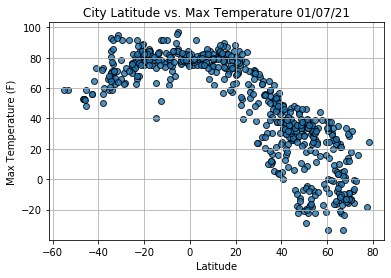

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
    max_temps,
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

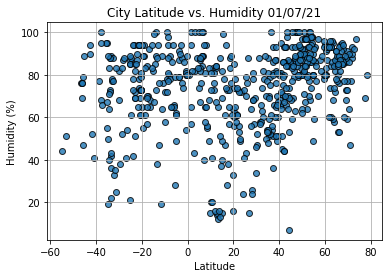

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
    humidity,
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

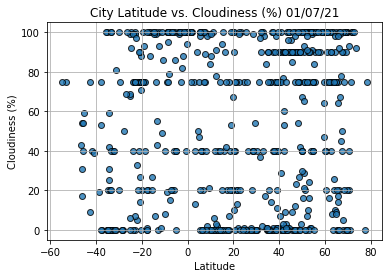

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
    cloudiness,
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

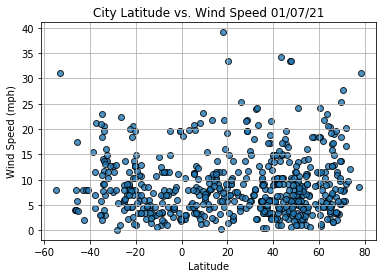

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
    wind_speed,
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [36]:
# Import linregress
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [28]:
index13 = city_data_df.loc[13]
index13

City                   Baruun-Urt
Country                        MN
Date          2021-01-07 19:24:46
Lat                       46.6806
Lng                       113.279
Max Temp                   -17.54
Humidity                       82
Cloudiness                      0
Wind Speed                   9.22
Name: 13, dtype: object

In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
City_ID,,,,,,,,,
0,Kapaa,US,2021-01-07 19:24:42,22.0752,-159.3190,75.20,73,1,10.36
1,Edson,CA,2021-01-07 19:24:42,53.5835,-116.4356,23.00,68,1,2.30
2,Hilo,US,2021-01-07 19:24:37,19.7297,-155.0900,75.20,64,20,5.75
3,Teknaf,BD,2021-01-07 19:24:43,20.8624,92.3058,70.16,62,0,7.02
6,Mahon,ES,2021-01-07 19:24:14,39.8885,4.2658,46.40,81,75,14.97


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

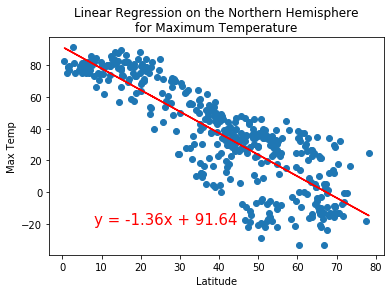

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature',
                       'Max Temp',
                       (8, -20))

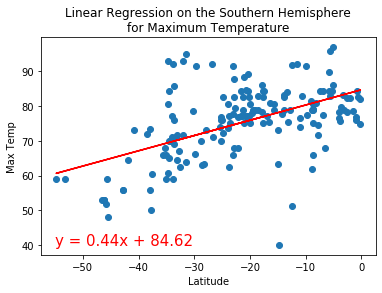

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature',
                       'Max Temp',
                       (-55, 40))

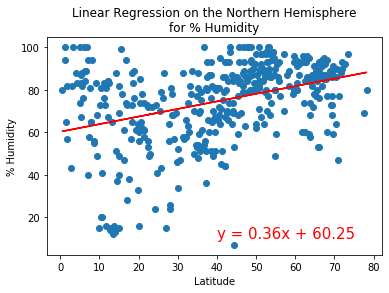

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity',
                       '% Humidity',
                       (40, 10))

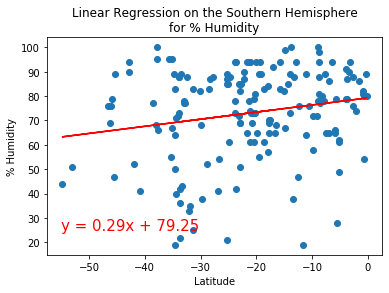

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity',
                       '% Humidity',
                       (-55, 25))

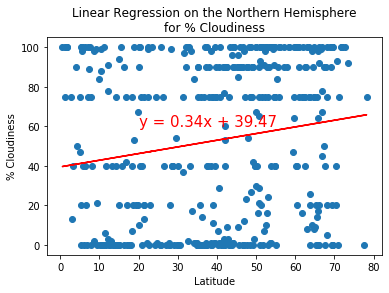

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness',
                       '% Cloudiness',
                       (20, 60))

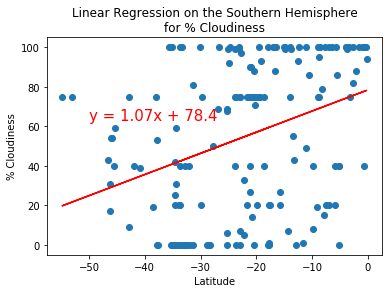

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness',
                       '% Cloudiness',
                       (-50,63))

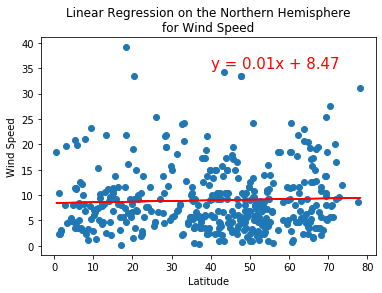

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed',
                       'Wind Speed',
                       (40, 35))

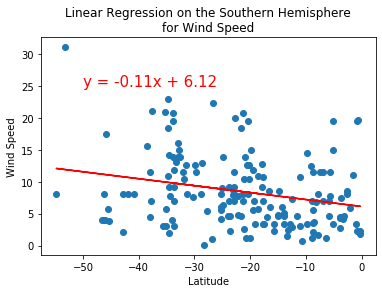

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed',
                       'Wind Speed',
                       (-50, 25))